# Analisis exploratorio de Datos
### Importamos librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
from ydata_profiling import ProfileReport
import pandas as pd


### Importamos el dataset

In [9]:
dftotal = pd.read_parquet('./total_plataformas1.parquet')
dftotal.head(2)


,show_id,type,title,director,cast,country,date_added,release_year,rating_x,duration,listed_in,description,platform,duration_int,duration_type,userId,rating_y,timestamp,movieId,score
0,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,amazon,113,min,543,5.0,1059596582,as1,3.467131
1,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,amazon,113,min,595,3.0,839937603,as1,3.467131


In [10]:
#corregimos timestamp a su formato adecuando
dftotal['timestamp']=pd.to_datetime(dftotal['timestamp'], unit ='s').dt.strftime('%Y/%m/%d')

In [14]:
dftotal['timestamp'] = pd.to_datetime(dftotal['timestamp'])

### Informacion del Dataset

In [15]:
dftotal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11024289 entries, 0 to 11024288
Data columns (total 20 columns):
 #   Column         Dtype         
---  ------         -----         
 0   show_id        object        
 1   type           object        
 2   title          object        
 3   director       object        
 4   cast           object        
 5   country        object        
 6   date_added     datetime64[ns]
 7   release_year   int32         
 8   rating_x       object        
 9   duration       object        
 10  listed_in      object        
 11  description    object        
 12  platform       object        
 13  duration_int   int32         
 14  duration_type  object        
 15  userId         int64         
 16  rating_y       float64       
 17  timestamp      datetime64[ns]
 18  movieId        object        
 19  score          float64       
dtypes: datetime64[ns](2), float64(2), int32(2), int64(1), object(13)
memory usage: 1.6+ GB


In [12]:
dftotal.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating_x,duration,listed_in,description,platform,duration_int,duration_type,userId,rating_y,timestamp,movieId,score
0,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,amazon,113,min,543,5.0,2003/07/30,as1,3.467131
1,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,amazon,113,min,595,3.0,1996/08/13,as1,3.467131


### Vemos el tamano de los datos

In [17]:
print('cantidad de filas', dftotal.shape[0])
print('cantidad de columnas', dftotal.shape[1])

cantidad de filas 11024289
cantidad de columnas 20


### Vemos los duplicados

In [25]:
dftotal.duplicated().sum()

1683707

In [19]:
#corroboramos
dftotal[dftotal.duplicated()].head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating_x,duration,listed_in,description,platform,duration_int,duration_type,userId,rating_y,timestamp,movieId,score
1079,as3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,74 min,"action, drama, suspense",after a man discovers his wife is cheating on ...,amazon,74,min,21661,4.0,2016-11-16,as3,3.500000
1453,as4,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,69 min,documentary,"pink breaks the mold once again, bringing her ...",amazon,69,min,8659,4.0,2001-08-06,as4,3.538055


In [18]:
dftotal[dftotal.show_id == 'ns3']

,show_id,type,title,director,cast,country,date_added,release_year,rating_x,duration,listed_in,description,platform,duration_int,duration_type,userId,rating_y,timestamp,movieId,score
6800388,ns3,tv show,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",None,2021-09-24,2021,tv-ma,1 Season,"crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...,netflix,1,Season,492,4.0,2010-07-30,ns3,3.597938
6800389,ns3,tv show,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",None,2021-09-24,2021,tv-ma,1 Season,"crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...,netflix,1,Season,671,4.0,2014-07-07,ns3,3.597938
6800390,ns3,tv show,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",None,2021-09-24,2021,tv-ma,1 Season,"crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...,netflix,1,Season,908,3.0,2012-05-05,ns3,3.597938
6800391,ns3,tv show,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",None,2021-09-24,2021,tv-ma,1 Season,"crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...,netflix,1,Season,924,2.0,2015-12-11,ns3,3.597938
6800392,ns3,tv show,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",None,2021-09-24,2021,tv-ma,1 Season,"crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...,netflix,1,Season,992,3.0,1996-05-17,ns3,3.597938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6800868,ns3,tv show,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",None,2021-09-24,2021,tv-ma,1 Season,"crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...,netflix,1,Season,123416,5.0,2013-03-09,ns3,3.597938
6800869,ns3,tv show,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",None,2021-09-24,2021,tv-ma,1 Season,"crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...,netflix,1,Season,123484,3.5,2015-09-22,ns3,3.597938
6800870,ns3,tv show,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",None,2021-09-24,2021,tv-ma,1 Season,"crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...,netflix,1,Season,123504,3.0,1996-12-28,ns3,3.597938
6800871,ns3,tv show,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",None,2021-09-24,2021,tv-ma,1 Season,"crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...,netflix,1,Season,123925,4.0,2000-08-06,ns3,3.597938


In [20]:
dftotal.drop_duplicates(inplace=True)

## Revisamos datos faltantes

In [22]:
import missingno as msno

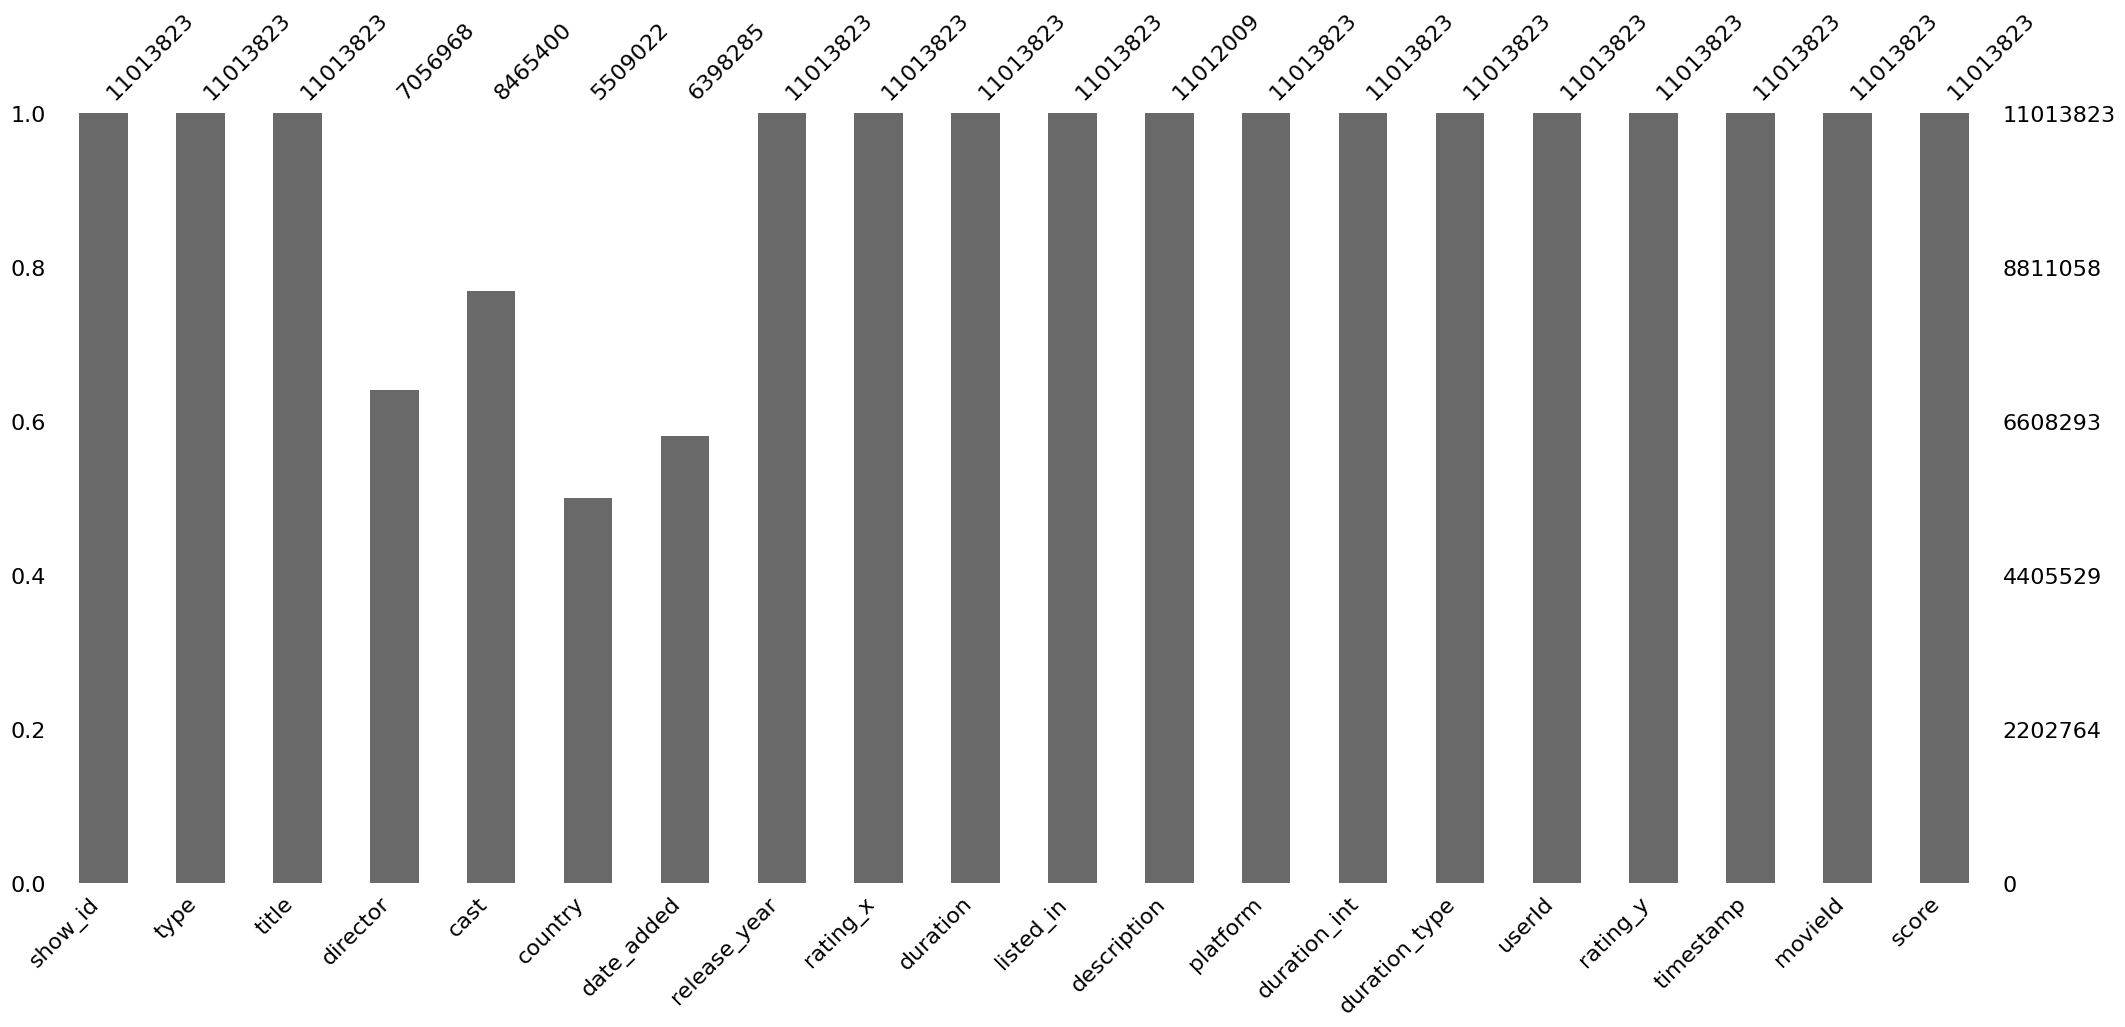

In [23]:
msno.bar(dftotal)
plt.show()

## Vemos los autliers 
### los outliers son valores anormales pero no siempre son errores

In [ ]:
sns.pairplot(dftotal)

## Codificamos las variables categoricas

In [25]:
#codificamos el show_id
#importamos la libreria para traer labelEnoder
from sklearn.preprocessing import LabelEncoder

In [28]:
col = dftotal.show_id 

# creamos objeto labelencoder y ajustamos la columna
labelE = LabelEncoder()
labelE.fit(col)

#tranformamos la columna
col_transformada = labelE.transform(col)

#lo reemplazamos a show id original
dftotal.show_id = col_transformada
dftotal.sample(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating_x,duration,listed_in,description,platform,duration_int,duration_type,userId,rating_y,timestamp,movieId,score
9379736,19059,movie,tom segura: completely normal,jay chapman,tom segura,united states,2017-07-13,2014,tv-ma,74 min,stand-up comedy,levelheaded stand-up tom segura shares offhand...,netflix,74,min,64523,3.5,2017-04-19,ns5380,3.479830
3232614,6384,tv show,helix studios presents,None,"alex riley, travis stevens, max carter, johnny...",None,2021-07-23,2020,18+,2 Seasons,"comedy, lgbtq, romance",queer anthology series surrounding the lives o...,amazon,2,Season,12635,3.0,2010-07-18,as6745,3.496862
10212482,20986,movie,jackie brown,quentin tarantino,"pam grier, samuel l. jackson, robert forster, ...",united states,2019-08-01,1997,r,154 min,"dramas, thrillers",when an aging flight attendant's caught smuggl...,netflix,154,min,12135,4.5,2005-09-22,ns7114,3.520000
